# Exploring San Francisco City Employee Salaries

Hannah, Han Zhang)

## 1. Business Understanding

One way to understand how a city government works is by looking at who it employs and how its employees are compensated.

SF Salaries data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014, including both numerical and categorical features. It matches the Lab One requirement and is free to download at kaggle.com. The main idea of this analysis is to know income sturcture and make futher predictions through visualizing the features, exploring relationships within features. 

Through visualizing the features,  exploring the features relationships and other methods, we are able to help government control public sentiments by adjusting related policies.

Overall, the analytics also aid to help government or personal organization to make future job requirement decision and help job seekers to match the best price for their job.

=======================================================================

Dataset: Human Resources Analytics URL: [https://www.kaggle.com/kaggle/sf-salaries](https://www.kaggle.com/kaggle/sf-salaries).

## 2. Data Understanding

### 2.1 Data Description

In [68]:
# load the SF-salaries dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings

#use notebook visualization
%matplotlib inline 
# never print matching warnings
warnings.filterwarnings("ignore")
# Read CSV (comma-separated) file into DataFrame
df_salariesInput = pd.read_csv('/Users/hanzhang/myJupyter/My Practices/Lab_One/Salaries.csv') 
df_salariesInput.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**_BasePay_**, **_OvertimePay_**, **_OtherPay_** and **_Benefits_** have wrong types. They are objects, but we think they should be number types and we want to convert them. In case that these columns may contain not numerical values, <mark>errors='coerce'</mark> attribute is used to coerce invalid values to NaN.

In [69]:
# convert the pay columns to numeric
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df_salariesInput[column] = pd.to_numeric(df_salariesInput[column], errors='coerce')

In [70]:
print(df_salariesInput.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB
None


Based on the dataframe information above, especially the RangeIndex, some features have no missing values, such as "JobTitle" and "TotalPay", while some do, such as "Benefits".

Let's then take a closer look at them.

In [71]:
print('Agency unique values:')
df_salariesInput['Agency'].unique()

Agency unique values:


array(['San Francisco'], dtype=object)

In [72]:
print('Status unique values:')
df_salariesInput['Status'].unique()

Status unique values:


array([nan, 'PT', 'FT'], dtype=object)

In [73]:
print('Notes unique values:')
df_salariesInput['Notes'].unique()

Notes unique values:


array([ nan])

**_Agency_** column is all the same not giving us any useful information, and **_Notes_** column seems to be missing a lot of values. Status contains work schedule and has two option: Part-Time (PT) or Full-Time (FT). Laterly, we'll use those with meaningful _Status_ values.

Let's drop **_Agency_**, **Notes** and **Id** columns using <mark>drop</mark> method.

In [74]:
# axis is either 0 for rows, 1 for columns

df_salariesInput.drop(["Id", "Notes", "Agency"], axis = 1, inplace = True)
df_salariesInput.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN


Since we have quite amount of missing values in _Benefits_ and _BasePay_, we will just drop the rows with missing value in that two features. 

In [75]:
#df_salariesInput = df_salariesInput[pd.notnull(df_salariesInput['Benefits'])]

In [76]:
#df_salariesInput.info()
df = df_salariesInput.dropna(subset=['Benefits'])
#df_salariesInput.info()

In [77]:
df_dropNan = df.dropna(subset=['BasePay'])

In [78]:
df_dropNan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111886 entries, 36159 to 148653
Data columns (total 10 columns):
EmployeeName        111886 non-null object
JobTitle            111886 non-null object
BasePay             111886 non-null float64
OvertimePay         111886 non-null float64
OtherPay            111886 non-null float64
Benefits            111886 non-null float64
TotalPay            111886 non-null float64
TotalPayBenefits    111886 non-null float64
Year                111886 non-null int64
Status              38119 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 9.4+ MB


Now, we only have missing value in _Status_, which we will keep and use later.

In [79]:
df_dropNan["JobTitle"] = df_salariesInput.JobTitle.str.replace("\\d+|\b\w\b","").str.lower()

In [80]:
# create a data description table
data_tab = pd.DataFrame()

data_tab['Features'] = df_dropNan.columns
data_tab['Description'] = ['name','JobTitle','the base rate of pay for a job', 
                           'pay received for the time beyond normal working hours',
                          'Supplemental Pay, Awards, Etc.', 
                           " benefits in kind include various types of non-wage compensation provided to employees in addition to their normal wages or salaries",'','','',
                           'it is a part-time or full-time']
data_tab['Scales'] = ['norminal'] * 2 + ['ratio'] * 6 + ['interval'] + ['norminal']
data_tab['Discrete\Continuous'] = ['discrete'] * 2 + ['continuous'] * 6 + ['discrete'] * 2 
#data_tab['Range'] = [repr(set(df_salariesInput.EmployeeName))] + [repr(set(df_salariesInput.JobTitle))] + ['n'] * 6 + ['2011, 2012,2013,2014'] + ['FT, PT, NaN']
                        
data_tab

,Features,Description,Scales,Discrete\Continuous
0,EmployeeName,name,norminal,discrete
1,JobTitle,JobTitle,norminal,discrete
2,BasePay,the base rate of pay for a job,ratio,continuous
3,OvertimePay,pay received for the time beyond normal workin...,ratio,continuous
4,OtherPay,"Supplemental Pay, Awards, Etc.",ratio,continuous
5,Benefits,benefits in kind include various types of non...,ratio,continuous
6,TotalPay,,ratio,continuous
7,TotalPayBenefits,,ratio,continuous
8,Year,,interval,discrete
9,Status,it is a part-time or full-time,norminal,discrete


### 2.2 Explore the Data
#### 2.2.1 TotalPay

Let's look at this numerical variable. According to the data description, there exist some werid numbers eg. some people have negative pay, $-618.


In [81]:
 df_dropNan[df_dropNan['TotalPay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
148653,Joe Lopez,"counselor, log cabin ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,PT


In [82]:
# list the top 5 people whose TotalPay is 0.
df_dropNan[df_dropNan['TotalPay'] == 0].head(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
70877,Roland Baylon,deputy court clerk ii,0.0,0.0,0.0,3728.05,0.0,3728.05,2012,NaN
70927,Felecia Phillips,registered nurse,0.0,0.0,0.0,3618.13,0.0,3618.13,2012,NaN
70928,Robert Giannini,painter,0.0,0.0,0.0,3614.56,0.0,3614.56,2012,NaN
70932,Nelly Kuan,senior eligibility worker,0.0,0.0,0.0,3610.32,0.0,3610.32,2012,NaN
70933,William Mathews,transit power line worker,0.0,0.0,0.0,3608.42,0.0,3608.42,2012,NaN


In [83]:
print("People work for no money: ",len(df_dropNan[df_dropNan['TotalPay'] == 0]))

People work for no money:  73


So we have 73 people with 0 TotalPay. Perhaps they’re retired, on disability, or something else?

In [84]:
df_dropNan[(df_dropNan['TotalPay'] < 100) & (df_dropNan['TotalPay'] > 0)].head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
70981,Linda Jackson,psychiatric technician,0.00,0.0,17.95,3487.20,17.95,3505.15,2012,NaN
72455,Clayton Breitweiser,recreation leader,64.46,0.0,0.00,485.67,64.46,550.13,2012,NaN
72779,Madeleine Wilhite,public service trainee,98.00,0.0,0.00,26.34,98.00,124.34,2012,NaN
72784,Elizabeth Cheng,pool lifeguard,93.09,0.0,1.35,24.66,94.44,119.10,2012,NaN
72786,Heidi Lee,special examiner,94.00,0.0,0.00,24.16,94.00,118.16,2012,NaN


We have 372 people whith total pay under $100. This probably includes people who were paid for, say, an hour of their time.

#### 2.2.2 JobTitle

Now take a look at the categorical variables. The representation of the JobTitle feature needs to be fixed a bit, since the same job in uppercase and lowercase are treated as two different jobs.

In [85]:
# Let's fix it and list the top 10 populer jobs.
df_dropNan["JobTitle"] = df_dropNan.JobTitle.str.replace("\\d+|\b\w\b","").str.lower()
df_dropNan["JobTitle"].value_counts().head(10)

transit operator                6975
special nurse                   4382
registered nurse                3725
police officer                  3549
public svc aide-public works    2514
custodian                       2409
firefighter                     2348
recreation leader               1968
patient care assistant          1940
deputy sheriff                  1914
Name: JobTitle, dtype: int64

In [86]:
fullTime = df_dropNan[df_dropNan['Status'] == 'FT']
partTime = df_dropNan[df_dropNan['Status'] == 'PT']
unique_job_titles = df_dropNan.JobTitle.unique()

print('All unique job titles:', len(df_dropNan['JobTitle'].unique()) - 1)
print('Full-time unique job titles:', len(fullTime['JobTitle'].unique()) - 1)
print('Part-time unique job titles:', len(partTime['JobTitle'].unique()) - 1)

All unique job titles: 1034
Full-time unique job titles: 858
Part-time unique job titles: 667


##### 2.2.2.1 Deal with the various values

Data in this column is very various and we need to simplify these values. I'm going to split all data into individual words and count their frequency. Then I'll look through top 200 words and try to divide them into several job groups. Each group corresponds a set of words that contain in the job titles of people working in this group. In the end, I'll spread each person to one of the groups. The remaining will be placed in the group called 'other'.

In [87]:
# Resource:https://www.kaggle.com/dmitriy19/explore-sf-salary-data-quick-eda
from collections import Counter
job_titles = df_dropNan['JobTitle'].unique()[:-1] # deleting the last element "Not provided"

words_in_titles = []

for job_title in job_titles:
    words_in_titles += job_title.lower().split()
    
# a little cleaning
words = []
for word in words_in_titles:
    if not word.isdigit() and len(word) > 3:
        words.append(word)
    
words_count = Counter(words)

In [88]:
words_count.most_common(20)

[('supervisor', 66),
 ('senior', 63),
 ('sprv', 51),
 ('assistant', 46),
 ('clerk', 43),
 ('asst', 41),
 ('worker', 36),
 ('court', 32),
 ('technician', 32),
 ('inspector', 31),
 ('officer', 31),
 ('manager', 28),
 ('specialist', 28),
 ('analyst', 28),
 ('chief', 25),
 ('tech', 22),
 ('services', 21),
 ('transit', 20),
 ('service', 19),
 ('health', 18)]

In [89]:
# define our own job groups
job_groups = {'Fire'    : ['fire'],
              'Animal'  : ['animal'],
              'Mayor'   : ['mayor'],
              'Library' : ['librar'],
              'Parking' : ['parking'],
              'Clerk'   : ['clerk'],
              'Porter'  : ['porter'],
              'Engineer and Tech': ['engineer', 'programmer', 'electronic', 'tech'], 
              'Court'   : ['court', 'legal', "attorney's", 'atty', 'eligibility'], 
              'Police'  : ['sherif', 'officer', 'police', 'probation', "sheriff's", 'sergeant'],
              'Medical' : ['nurse', 'medical', 'health', 'physician', 'therapist', 'psychiatric', 
                           'treatment', 'hygienist','anesthetist','nursing','forensic toxicologist', 'patient'],
              'Public Works' : ['public'],
              'Food Service' : ['food'],
              'Architectural' : ['architect'],
             'Law': ['attorney'],
             'Mechanic':['mechanic'],
             'Transportation':['transit','transportation','airport'],
             'Finance':['investments']}

In [90]:
def transform_func(title):
    title = title.lower()
    for key, value in job_groups.items():
        for each_value in value:
            if title.find(each_value) != -1:
                return key
    return 'Other'

In [91]:
df_dropNan['JobGroup'] = df_dropNan['JobTitle'].apply(transform_func)

In [92]:
df_dropNan.head(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status,JobGroup
36159,Gary Altenberg,"lieutenant, fire suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,Fire
36160,Gregory Suhr,chief of police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,Police
36161,Khoa Trinh,electronic maintenance tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,NaN,Engineer and Tech
36162,Joanne Hayes-White,"chief, fire department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,Fire
36163,Frederick Binkley,emt/paramedic/firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,NaN,Fire
36164,Amy Hart,dept head v,271607.74,0.00,19782.03,84681.82,291389.77,376071.59,2012,NaN,Other
36165,Edward Reiskin,"gen mgr, public trnsp dept",294000.17,0.00,0.00,82001.94,294000.17,376002.11,2012,NaN,Public Works
36166,John Martin,dept head v,287747.89,0.00,5274.57,81824.37,293022.46,374846.83,2012,NaN,Other
36167,John Goldberg,captain,104404.00,0.00,245999.41,24287.23,350403.41,374690.64,2012,NaN,Other
36168,David Franklin,asst chf of dept (fire dept),204032.52,85503.16,26193.09,58486.10,315728.77,374214.87,2012,NaN,Fire


In [93]:
df_dropNan['JobGroup'].unique()

array(['Fire', 'Police', 'Engineer and Tech', 'Other', 'Public Works',
       'Transportation', 'Medical', 'Mayor', 'Finance', 'Law', 'Court',
       'Mechanic', 'Library', 'Architectural', 'Porter', 'Parking',
       'Clerk', 'Food Service', 'Animal'], dtype=object)

#### 2.2.3 The Year

As we drop the missing values in benefits, we are just dealing with data gathered in _Year_ 2012, 2013, 2014.

In [94]:
df_dropNan['Year'].unique()

array([2012, 2013, 2014])

## 3. Data Visualization

### 3.1 Total Pay for Each Year

Now let's do some visualisation on _TotalPay_ for each _year_.

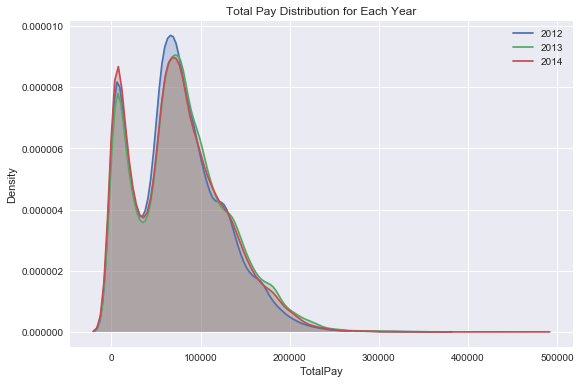

In [95]:
tp_2011 = df_dropNan[df_dropNan['Year'] == 2011]
tp_2012 = df_dropNan[df_dropNan['Year'] == 2012]
tp_2013 = df_dropNan[df_dropNan['Year'] == 2013]
tp_2014 = df_dropNan[df_dropNan['Year'] == 2014]

fig, ax = plt.pyplot.subplots(figsize=(9, 6))

sns.kdeplot(tp_2012['TotalPay'].dropna(), label="2012", shade=True, ax=ax)
sns.kdeplot(tp_2013['TotalPay'].dropna(), label="2013", shade=True, ax=ax)
sns.kdeplot(tp_2014['TotalPay'].dropna(), label="2014", shade=True, ax=ax)

plt.pyplot.xlabel('TotalPay')
plt.pyplot.ylabel('Density')
title = plt.pyplot.title('Total Pay Distribution for Each Year')

There are clearly outliers at the higher end of the range (and the boxplot makes it easier to see these outliers than the histogram). 

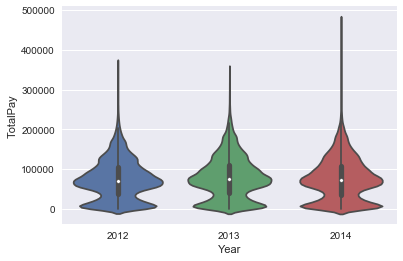

In [96]:
# box plot
sns.violinplot('Year', 'TotalPay', data= df_dropNan)

**Observation:**

It appears that 2014 may have had a very slight increase relative to the previous two years.

Let's then look at the benefits. How benefits has changed over _Year_.

(0, 96570.660000000003)

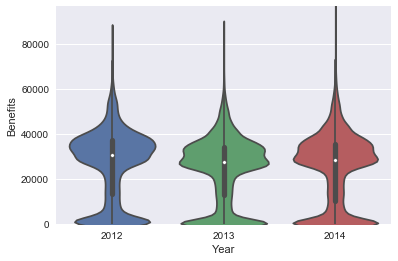

In [97]:
ax = sns.violinplot(x="Year", y="Benefits", data=df_dropNan)
# set data limit on y-axis
ax.set_ylim((0, df_dropNan.Benefits.max()))

**Observation:**

* 2014 still have had a very slight increase relative to the previous two years.
* Has a relatively wider Interquartile Range(IRQ), which describes the middle 50% of values when ordered from lowest to highest,

### 3.2 Total Pay for each Job Group


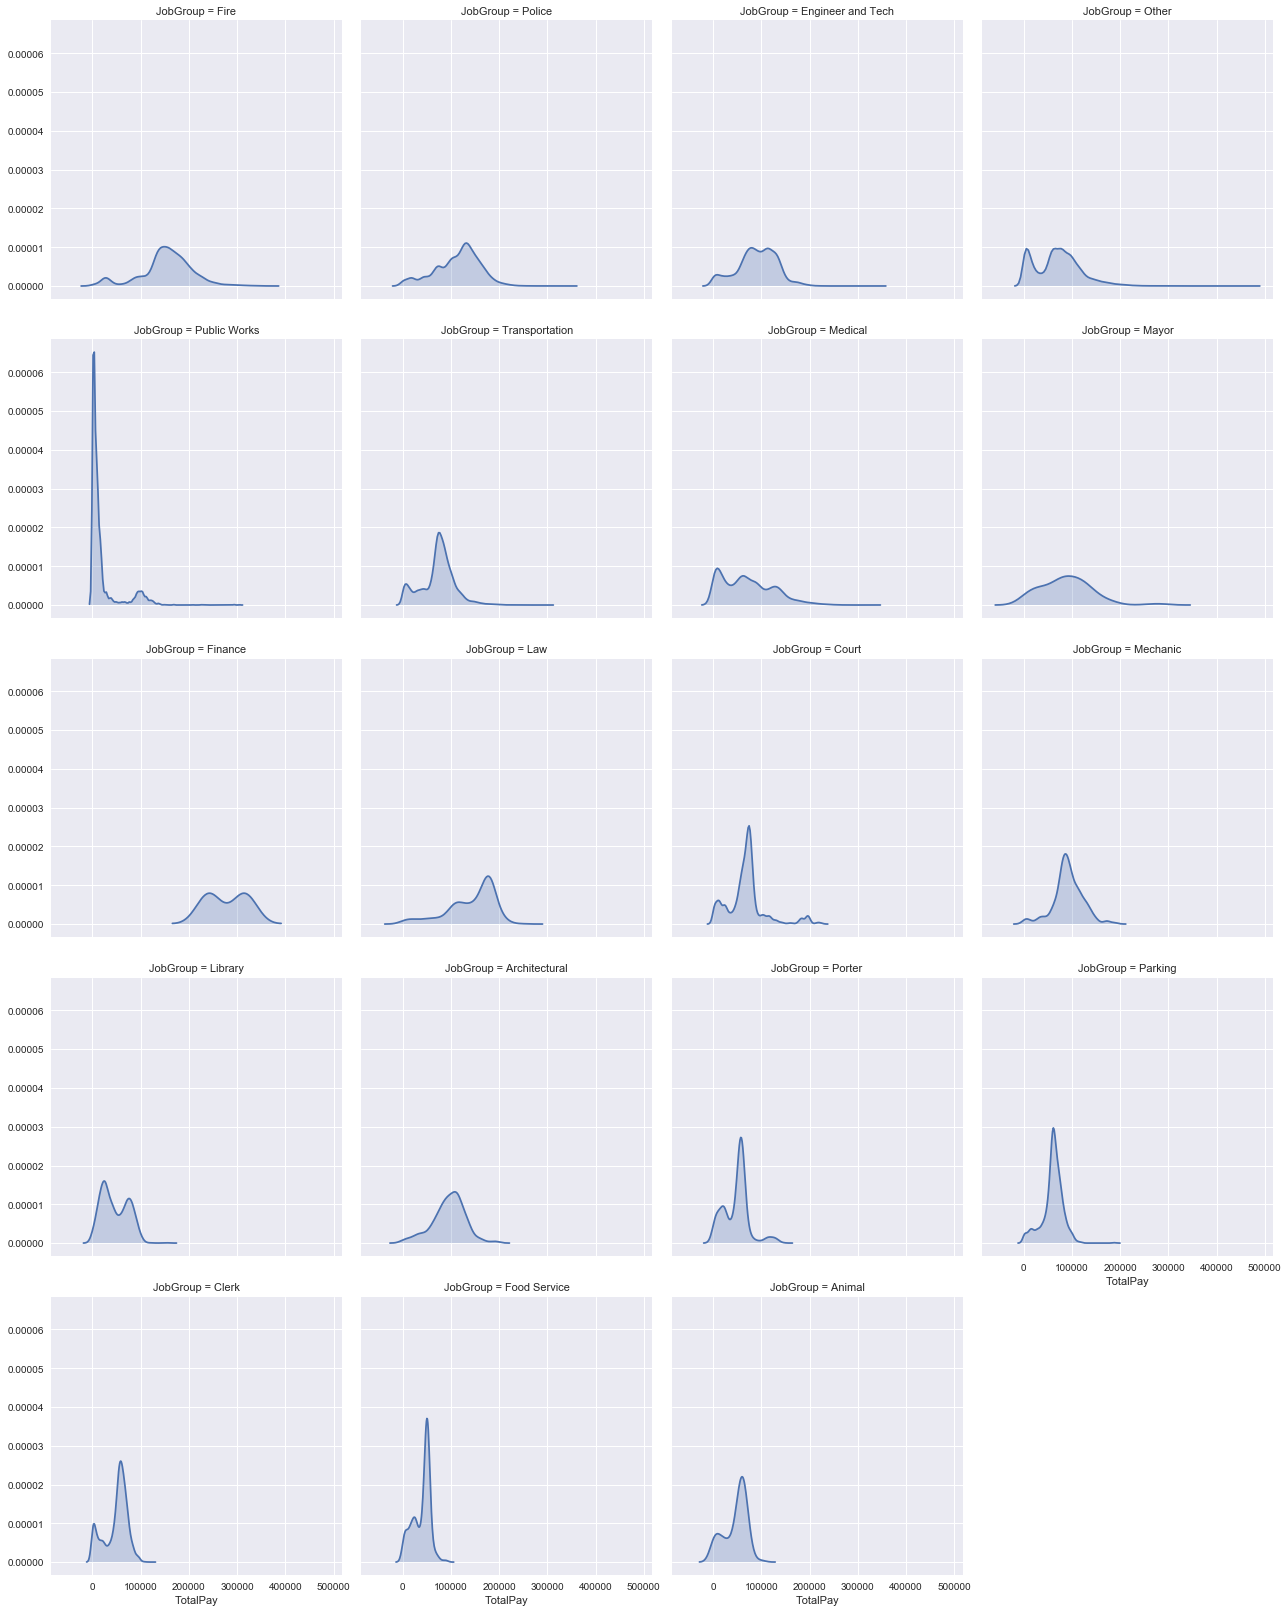

In [98]:
g = sns.FacetGrid(df_dropNan, col="JobGroup", col_wrap=4, size=4.5, dropna=True)
res = g.map(sns.kdeplot, 'TotalPay', shade=True)

**Observations:**

* The huge peak on the public works graph is quite eye-catching. Which indicates that the values on that graph mostly concentrate around zero. It shows how small the salaries of public workers. 
* Emplyees in investment are getting quite high salaries.

* Most of the graphs have more than one spikes. It is likely about the internal distribution within that specific job group. That's normal — some people have high posts, some have low posts.

* Some groups have one spike (Architectural, Fire, Mayor, etc.). It shows that in these group people generally get the same salary.

### 3.3 Job Status & Total Pay



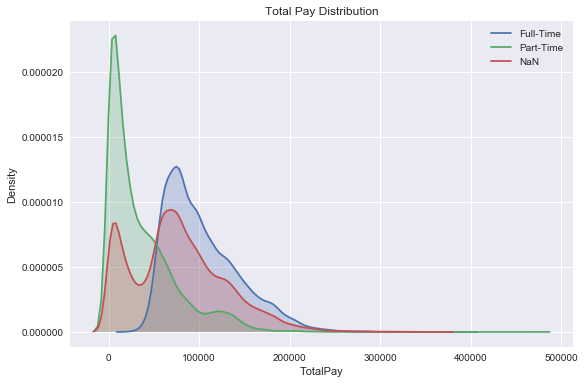

In [99]:
fig, ax = plt.pyplot.subplots(figsize=(9, 6))

ft_job = df_dropNan[df_dropNan['Status'] == 'FT']
pt_job = df_dropNan[df_dropNan['Status'] == 'PT']
notprovided = df_dropNan[(df_dropNan['Status'] != "FT") & (df_dropNan['Status'] != "PT")]

sns.kdeplot(ft_job.TotalPay, label="Full-Time", shade=True, ax=ax)
sns.kdeplot(pt_job.TotalPay, label="Part-Time", shade=True, ax=ax)
sns.kdeplot(notprovided.TotalPay, label="NaN",shade=True, ax=ax)

plt.pyplot.xlabel('TotalPay')
plt.pyplot.ylabel('Density')
title = plt.pyplot.title('Total Pay Distribution')

**Observations:**

* Part Time (PT) employees are compensated according to how much the city uses them - which is much less than full-time employees.

* The story with blank Status is a little more complicated. It looks like a lot of the blank entries should be full time; and some should be part time. We can see the graph split.

Let's take a closer look at the job group of Law. We will divide the employees into two groups: FT and PT.(Here we drop the missing values in _Status_.)

In [100]:
ft_law = df_dropNan[(df_dropNan['Status'] == 'FT') & (df_dropNan['JobGroup'] == 'Law')]
pt_law = df_dropNan[(df_dropNan['Status'] == 'PT') & (df_dropNan['JobGroup'] == 'Law')]

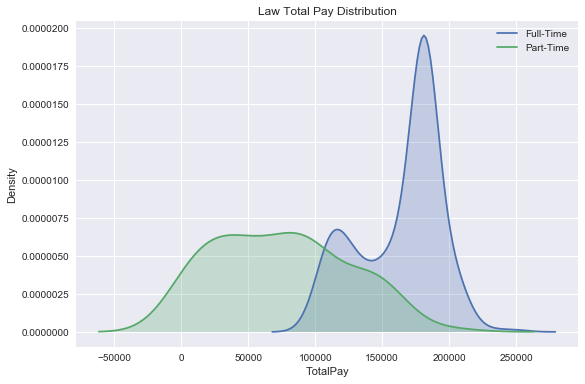

In [101]:
fig, ax = plt.pyplot.subplots(figsize=(9, 6))

sns.kdeplot(ft_law['TotalPay'].dropna(), label="Full-Time", shade=True, ax=ax)
sns.kdeplot(pt_law['TotalPay'].dropna(), label="Part-Time", shade=True, ax=ax)

plt.pyplot.xlabel('TotalPay')
plt.pyplot.ylabel('Density')
title = plt.pyplot.title('Law Total Pay Distribution')

**Observations:**

* Again, full-time workers, on average, receive higher salary than those working as part-time. 

### 3.4 Analyzing Full Time Employees



In [102]:
# ft_job = df_dropNan[df_dropNan['Status'] == 'FT']
# we have 22334 available full time job data
len(ft_job)

22334

In [103]:
ft_job.Year.unique()

array([2014])

In [104]:
ft_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22334 entries, 110532 to 140325
Data columns (total 11 columns):
EmployeeName        22334 non-null object
JobTitle            22334 non-null object
BasePay             22334 non-null float64
OvertimePay         22334 non-null float64
OtherPay            22334 non-null float64
Benefits            22334 non-null float64
TotalPay            22334 non-null float64
TotalPayBenefits    22334 non-null float64
Year                22334 non-null int64
Status              22334 non-null object
JobGroup            22334 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


Now, we find out why there are so many missing values in _Status_. Only Year 2014 has people categorized.

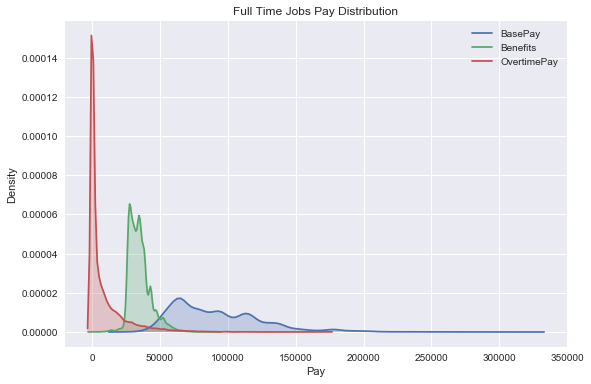

In [105]:
ft2014 = ft_job[(ft_job.Year == 2014) & (ft_job.Status == 'FT') ]

fig, ax = plt.pyplot.subplots(figsize=(9, 6))

sns.kdeplot(ft2014['BasePay'], label="BasePay", shade=True, ax=ax)
sns.kdeplot(ft2014['Benefits'], label="Benefits", shade=True, ax=ax)
sns.kdeplot(ft2014['OvertimePay'], label="OvertimePay", shade=True, ax=ax)

plt.pyplot.xlabel('Pay')
plt.pyplot.ylabel('Density')
title = plt.pyplot.title('Full Time Jobs Pay Distribution')

**Observations:**

 * we have a few spikes in Benefits and BasePay. Perhaps these are raised by diferent types of jobs, or different levels.
 
 * Interesting that the lowest benefit number is negative.
 * Someone made over $150,000 in overtime

### 3.5 Top 10 Jobs

#### 3.5.1 OvertimePay, Benefits and Basepay Distribution across the top 10
People would also curious about the top 10 jobs, then let's do it!
                   

In [106]:
# get the top ten jobs
top_ten_occupations = df_dropNan.JobTitle.value_counts().sort_values(ascending=False).head(10).index
top_ten_occupations

Index(['transit operator', 'special nurse', 'registered nurse',
       'police officer ', 'public svc aide-public works', 'custodian',
       'firefighter', 'recreation leader', 'patient care assistant',
       'deputy sheriff'],
      dtype='object')

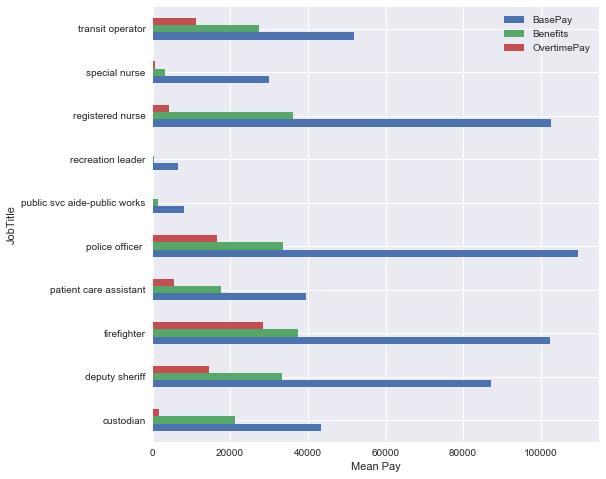

In [107]:
# aggregate by job title and pick out the BasePay, Benefits, and Overtime features
pay_by_occupation = (df_dropNan[df_dropNan.JobTitle.isin(top_ten_occupations)]
                                   .groupby('JobTitle')[['BasePay', 'Benefits', 'OvertimePay']]
                                   .aggregate('mean')
)

ax = pay_by_occupation.plot(kind='barh', figsize=(8,8))

ax.set_xlabel('Mean Pay')

* It seems that our firefighters, police officers and registered nurses are working overtime quite a bit. At the same time, they receive more benefits.
* Recreation leader and public service worker are getting much less money compared to other Top 10 jobs. But, they seem never need to work overtime. 

Let's see what's happening.

In [108]:
print("Number of employee as recreation leader:")
len(df_dropNan[df_dropNan.JobTitle == 'recreation leader'])

Number of employee as recreation leader:


1968

In [109]:
print("Number of employee as part-time recreation leader:")
len(df_dropNan[(df_dropNan.JobTitle == 'recreation leader') & (df_dropNan.Status == 'PT')])

Number of employee as part-time recreation leader:


690

People work as recreation leader generally are getting a relatively low base pay. Among this, part-time jobs take up almost 35%, which might be a factor. 

#### 3.5.2  BasePay Distribution of the Top 2 Job

Let's select the BasePay from the top 2 jobs, firefighter and police officer, in 2014.

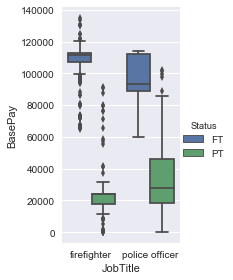

In [110]:
df_combine = df_dropNan[((df_dropNan.JobTitle == 'firefighter') | (df_dropNan.JobTitle == 'police officer')) & (df_dropNan.Year == 2014)]
g = sns.factorplot(x="JobTitle", y="BasePay", hue="Status",  data=df_combine, kind="box",size=4, aspect=.7);

* ** Observations:**

* IQR in the boxplot of police officer is much wider than that of firefighter both in PT and FT. Not sure why this happened. 
* Much more outliers in firefighters than that in police officer. Some part-time even receive as much basepay as the full-time.

### 3.6 Data Relationship Exploration

#### 3.6.1 Correaltion Matrix

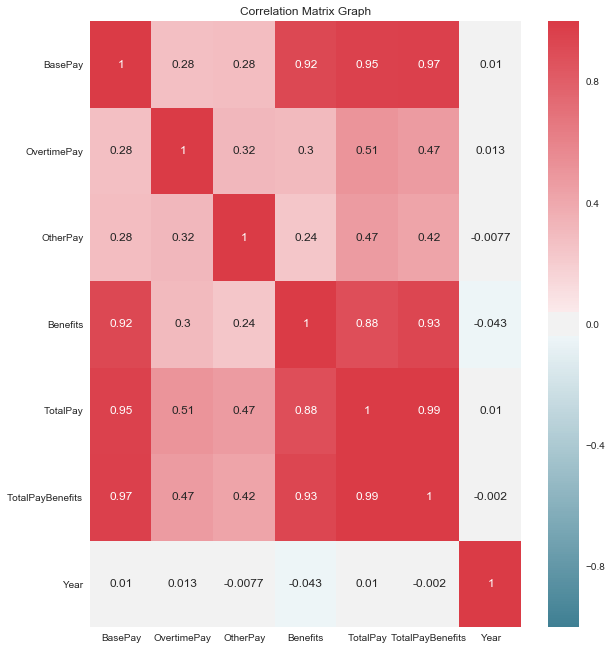

In [111]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.pyplot.subplots(figsize=(9, 9))

sns.heatmap(df_dropNan.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.pyplot.title('Correlation Matrix Graph')

**Observations:**

* According to the correlation table, all types of the pay have positive correlation with each other. Through our table, we are focusing benefits and basepay, it shows that they have comparatively strong positive correlation with each other, that means the higher the base pay people have, the higher benefits they have. 

#### 3.6.2 Scatterplot matrices

Scatterplot matrices are a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations to your genomic or proteomic data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ee2d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ff1aef0>]], dtype=object)

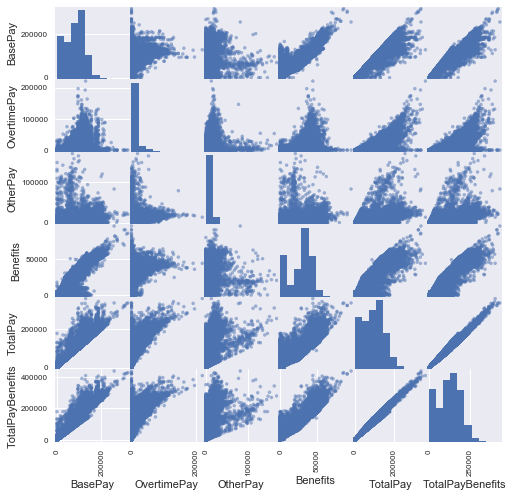

In [112]:
pay_columns = df_dropNan.columns[2:df_dropNan.columns.get_loc('Year')]

df_temp1 = df_dropNan[(df_dropNan['JobGroup'] == 'Medical') |(df_dropNan['JobGroup'] == 'Police')|
                     (df_dropNan['JobGroup'] == 'Fire') |(df_dropNan['JobGroup'] == 'Engineer and Tech')]

pd.scatter_matrix(df_temp1[pay_columns], figsize=(8,8))

**Observation:**

From the matrix of the scatter plots, we can see that the above features are not very good classifiers for the four job groups. Therefore, we are to transform the features into two principle components by using PCA in the section 4.

#### 3.6.4 OvertimePay, BasePay and Benefits

* **OvertimePay Vs. BasePay**

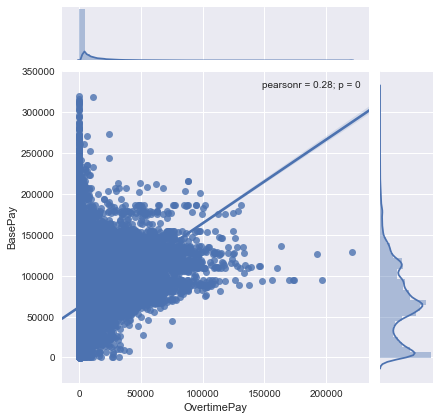

In [113]:
# Reference: http://seaborn.pydata.org/generated/seaborn.jointplot.html
df1 = pd.DataFrame(df_dropNan, columns = ['OvertimePay', 'BasePay'])
g = sns.jointplot("OvertimePay", "BasePay", data=df1, kind="reg")

Pearson correlation coefficient = 0.28

_OvertimePay_ and BasePay have a small positive linear correlation. 

* **OvertimePay Vs. Benefits**

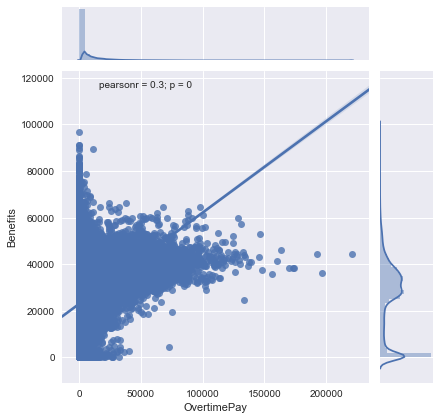

In [114]:
df2 = pd.DataFrame(df_dropNan, columns = ['OvertimePay', 'Benefits'])
g = sns.jointplot("OvertimePay", "Benefits", data=df2, kind="reg")

Pearson correlation coefficient = 0.3

_OvertimePay_ and _Benefits_ have a small positive linear correlation. 

* **Benefits Vs. BasePay**

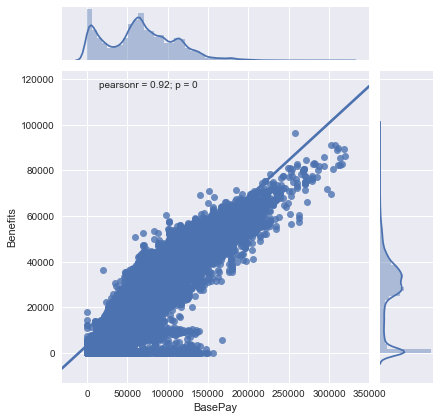

In [115]:
df3 = pd.DataFrame(df_dropNan, columns = ['BasePay', 'Benefits'])
g = sns.jointplot("BasePay", "Benefits", data=df3, kind="reg")

Pearson correlation coefficient = 0.92

That is to say, _BasePay_ and _Benefits_ have a positive linear correlation. People getting a high basepay are very likely receive a high benefits.

## 4. Dimensionality Reduction

* **Pair Plot**

In this section, four job groups are chosen to be analysed. They are 'Medical', 'Police', 'Fire', 'Engineer and Tech', which are replaced with number 1,2,3,4 for later use.

From the pairplot below, we can see that the job groups are not easily separated lineraly betweem most of the attribute pairs.

In [116]:
from sklearn.decomposition.pca import PCA
raw_data = pd.DataFrame(df_dropNan) # original data is a 111886 rows × 11 columns


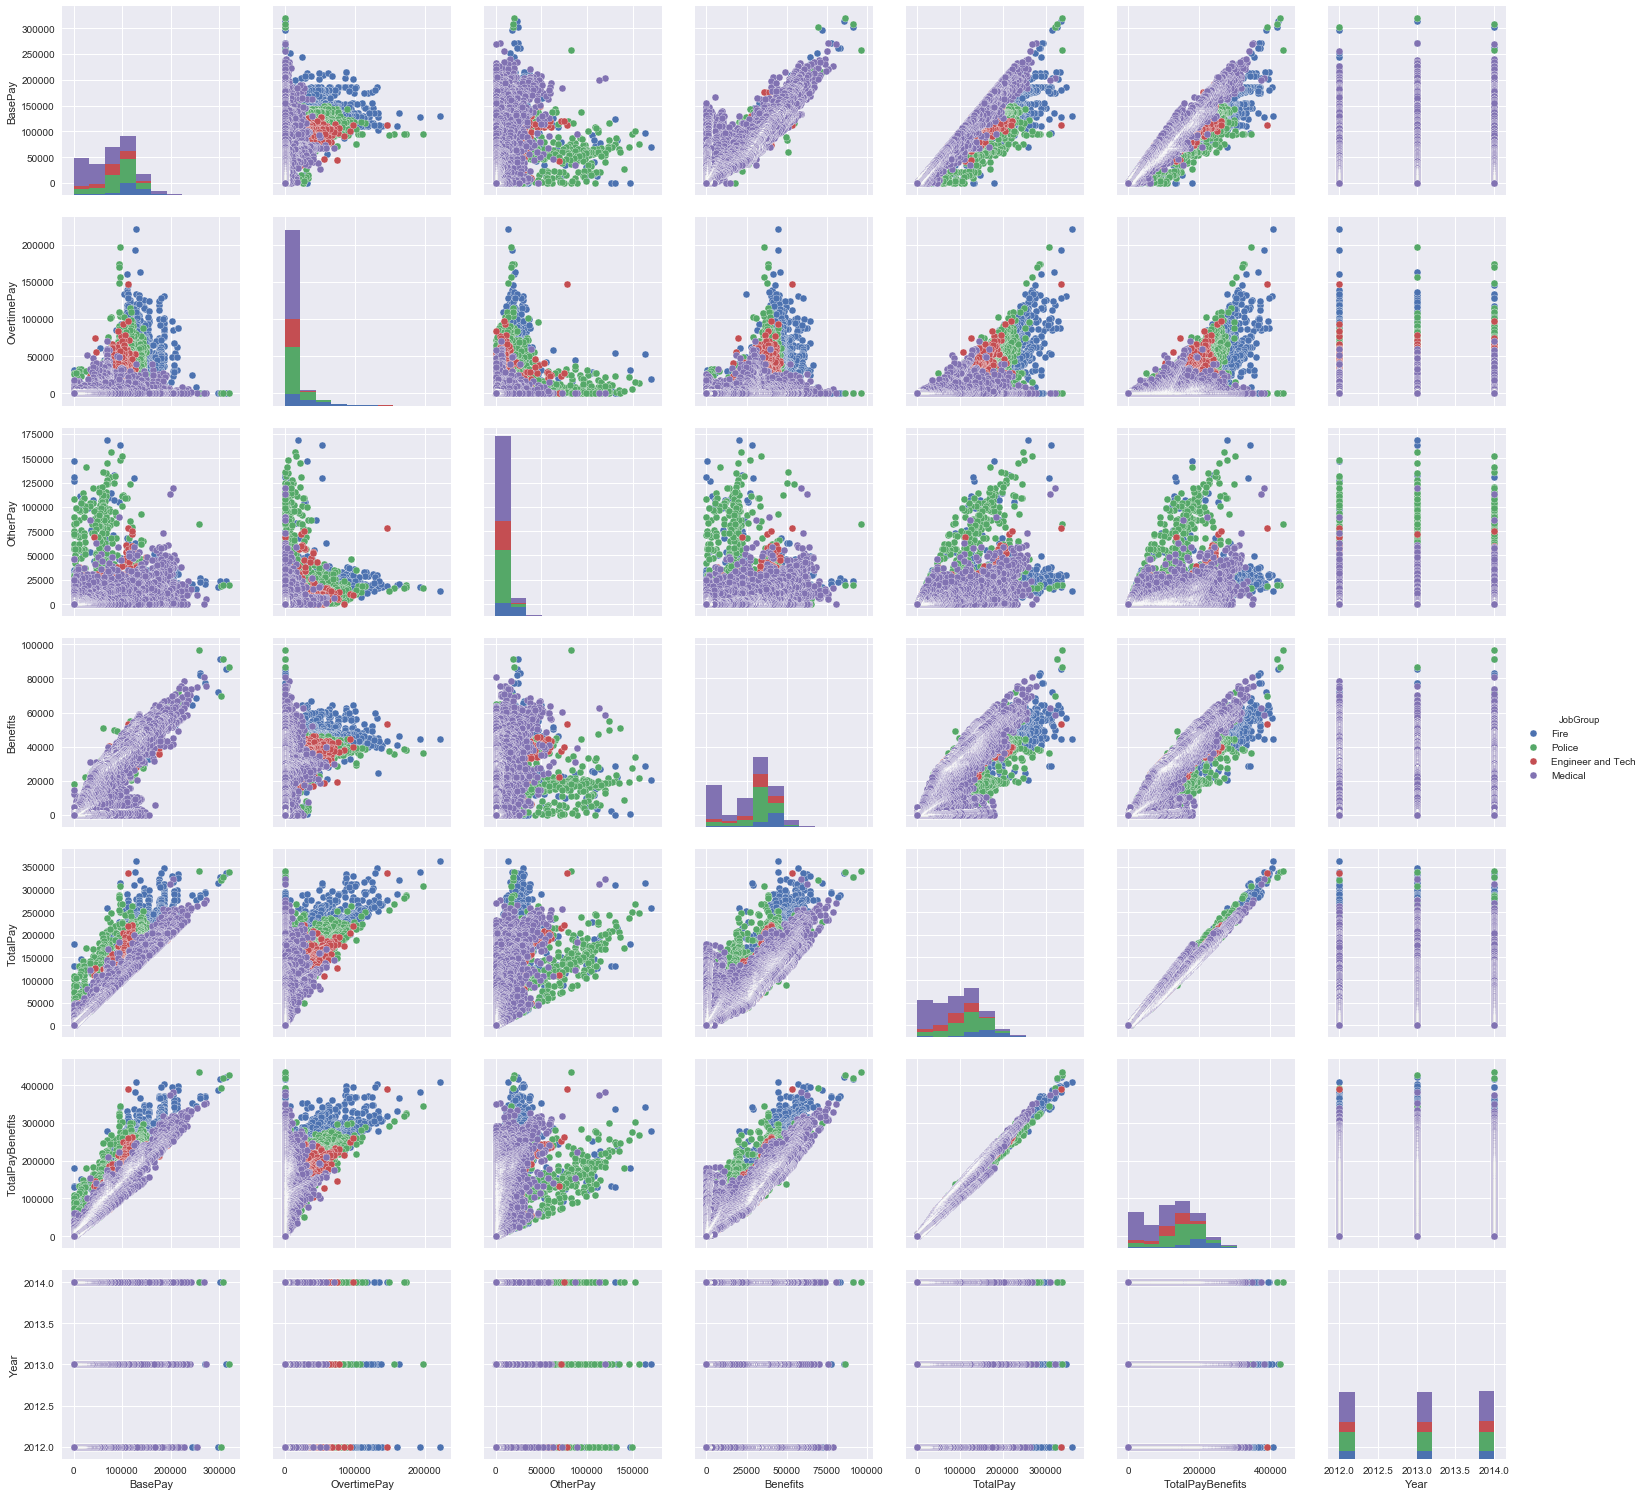

In [117]:
df_temp = df_dropNan[(df_dropNan['JobGroup'] == 'Medical') |(df_dropNan['JobGroup'] == 'Police')|
                     (df_dropNan['JobGroup'] == 'Fire') |(df_dropNan['JobGroup'] == 'Engineer and Tech')]

sns.pairplot(df_temp, size=3,hue='JobGroup')

* **PCA**

Now, we will use PCA to reduce the feature dimension and check whether types will be linearly separated in the reduced space. 

First, the data need to be fixed a bit.

* replace string job groups by integers
* drop string features

In [118]:
# replace the four job groups with number 1,2,3,4
df_temp.replace(to_replace = ['Fire', 'Police', 'Engineer and Tech','Medical'], value = range(1,5), inplace = True)

# get rid of all the str features, 39103*8 matrix
df_temp.drop(["Status",'JobTitle','EmployeeName'], axis = 1, inplace = True)
df_temp.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobGroup
36159,128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,1
36160,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,2
36161,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,3
36162,296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,1
36163,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,1


Now, all we have is numerical data.

The idea of PCA is to change the oringal data to a new space with less dimensionality, without any prior information. 
Since it is a pure mathematical transformation where the meaning of the attribute in the new space is not that understandable. 

Transpose data to 39103*8, where every column is an instance and every row has 8 attributes.
PCA reduce the dimensionality to n_components*39103, where n_components is 2.



In [121]:
# set reduced dimensionality = 2 and plot
# Reference: http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

pca = PCA(n_components=2)
pca.fit(df_temp.T)
# print components
print ('pca:', pca.components_)
print ('pca shape:', pca.components_.shape)

# components_ : array, shape (n_components, n_features), 39103 by 2 matrix here
x_new = pca.components_.T[:,0]
y_new = pca.components_.T[:,1]

jobgroup = np.array(df_temp.JobGroup)
index = np.arange(df_temp.JobGroup.count())

pca: [[  1.25107836e-02   1.50221258e-02   1.16082960e-02 ...,  -2.16230120e-05
   -2.17841869e-05  -2.17841869e-05]
 [ -6.35895987e-02   1.12646345e-02  -5.18369890e-02 ...,   7.99004421e-05
    8.08223540e-05   8.08223540e-05]]
pca shape: (2, 39103)


**Plot it !**

Also print the explained variance ratio of the first two components. Naturally, if the proportion of variation explained by the first k  principal components is large, then not much information is lost by considering only the first k principal components.

explained variance ratio (first two components): [ 0.98033332  0.0137689 ]


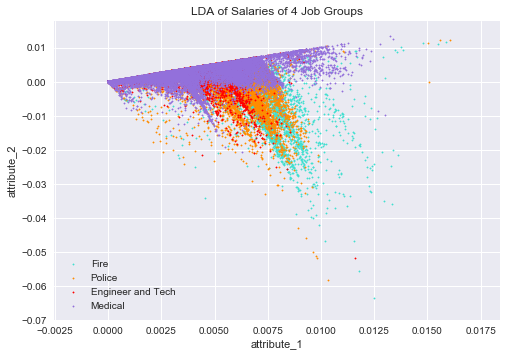

In [122]:
type_1 = plt.pyplot.scatter(x=x_new[index[jobgroup == 1]],y=y_new[index[jobgroup == 1]],color='turquoise',s=2)
type_2 = plt.pyplot.scatter(x=x_new[index[jobgroup == 2]],y=y_new[index[jobgroup == 2]],color='darkorange',s=2)
type_3 = plt.pyplot.scatter(x=x_new[index[jobgroup == 3]],y=y_new[index[jobgroup == 3]],color='r',s=2)
type_4 = plt.pyplot.scatter(x=x_new[index[jobgroup == 4]],y=y_new[index[jobgroup == 4]],color='mediumpurple',s=2)
plt.pyplot.legend((type_1, type_2,type_3,type_4),( 'Fire', 'Police','Engineer and Tech','Medical'),loc='lower left')
plt.pyplot.xlabel("attribute_1")
plt.pyplot.ylabel("attribute_2")
plt.pyplot.title('LDA of Salaries of 4 Job Groups')

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

**Observation:**

* The above plot shows that in the reduced space, the data still can't be linearly separated with types.
* PCA shows generally the same data distribution with the original dataset, but with less feature dimensions.
* The first prinicpal component explaines almost 98% of the variance.

## Reference

Kaggle. SF Salaries. https://www.kaggle.com/kaggle/sf-salaries (Accessed Aug. 2017)